In [60]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


In [47]:
# load data
column_names = [
    "Sex", "Length", "Diameter", "Height",
    "WholeWeight", "ShuckedWeight", "VisceraWeight", "ShellWeight", "Rings"
]

abalone_df = pd.read_csv("abalone/abalone.data", names=column_names)

print(abalone_df.head())

  Sex  Length  Diameter  Height  WholeWeight  ShuckedWeight  VisceraWeight  \
0   M   0.455     0.365   0.095       0.5140         0.2245         0.1010   
1   M   0.350     0.265   0.090       0.2255         0.0995         0.0485   
2   F   0.530     0.420   0.135       0.6770         0.2565         0.1415   
3   M   0.440     0.365   0.125       0.5160         0.2155         0.1140   
4   I   0.330     0.255   0.080       0.2050         0.0895         0.0395   

   ShellWeight  Rings  
0        0.150     15  
1        0.070      7  
2        0.210      9  
3        0.155     10  
4        0.055      7  


In [7]:
abalone_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sex            4177 non-null   object 
 1   Length         4177 non-null   float64
 2   Diameter       4177 non-null   float64
 3   Height         4177 non-null   float64
 4   WholeWeight    4177 non-null   float64
 5   ShuckedWeight  4177 non-null   float64
 6   VisceraWeight  4177 non-null   float64
 7   ShellWeight    4177 non-null   float64
 8   Rings          4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


/var/folders/_l/922q143j2tj5f063l0vxr_500000gn/T/ipykernel_9901/204738900.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(


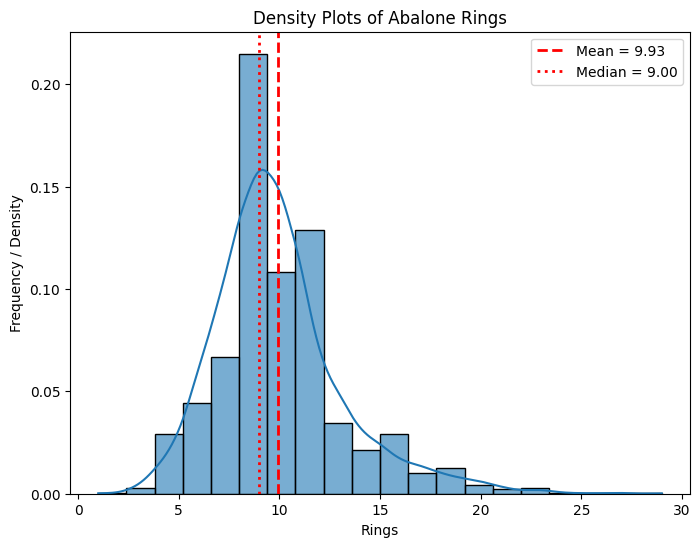

In [38]:
# distribution plot for target variable Rings

mean_rings = abalone_df['Rings'].mean()
median_rings = abalone_df['Rings'].median()

plt.figure(figsize=(8,6))
sns.histplot(
    data=abalone_df,
    x='Rings',
    kde=True,
    stat='density',
    palette='Set2',
    alpha=0.6,
    bins=20
)

plt.axvline(mean_rings, color='red', linestyle='--', linewidth=2, label=f'Mean = {mean_rings:.2f}')
plt.axvline(median_rings, color='red', linestyle=':',  linewidth=2, label=f'Median = {median_rings:.2f}')

plt.title("Density Plots of Abalone Rings")
plt.xlabel("Rings")
plt.ylabel("Frequency / Density")
plt.legend()

fig = plt.gcf()
fig.savefig('/Users/elvaliu/Classes/python_project/780_assignment_shinny/790/target.png', dpi=300)

plt.show()


/var/folders/_l/922q143j2tj5f063l0vxr_500000gn/T/ipykernel_9901/702904449.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


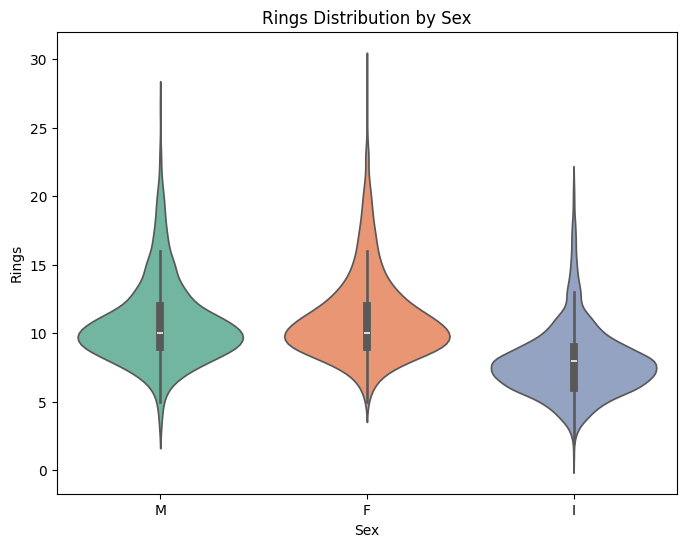

In [39]:
# plot for categorical variable Sex
plt.figure(figsize=(8, 6))
sns.violinplot(
    data=abalone_df,        
    x='Sex',          
    y='Rings',        
    palette='Set2',   
    inner='box'      
)

plt.title("Rings Distribution by Sex")
plt.xlabel("Sex")
plt.ylabel("Rings") 

fig = plt.gcf()
fig.savefig('/Users/elvaliu/Classes/python_project/780_assignment_shinny/790/sex.png', dpi=300)  
plt.show()

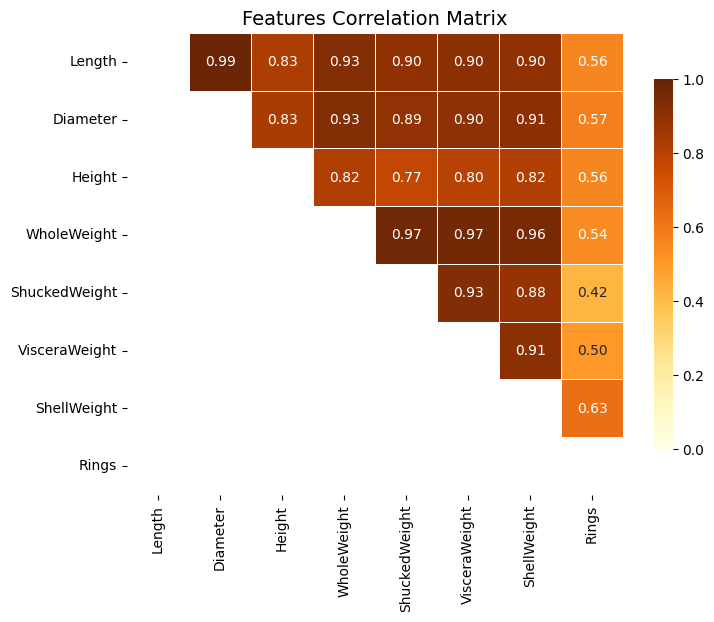

In [40]:
corr = abalone_df[numerical_var].corr()
mask = np.tril(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(8, 6))
sns.heatmap(
    corr, 
    mask=mask,         
    cmap="YlOrBr",     
    annot=True,        
    fmt=".2f",         
    vmin=0, vmax=1,    
    linewidths=.5,     
    cbar_kws={"shrink": .8} 
)
ax = plt.gca()
ax.set_facecolor("white")

plt.title("Features Correlation Matrix", fontsize=14)

fig = plt.gcf()
fig.savefig('/Users/elvaliu/Classes/python_project/780_assignment_shinny/790/corr.png', dpi=300)
plt.show()

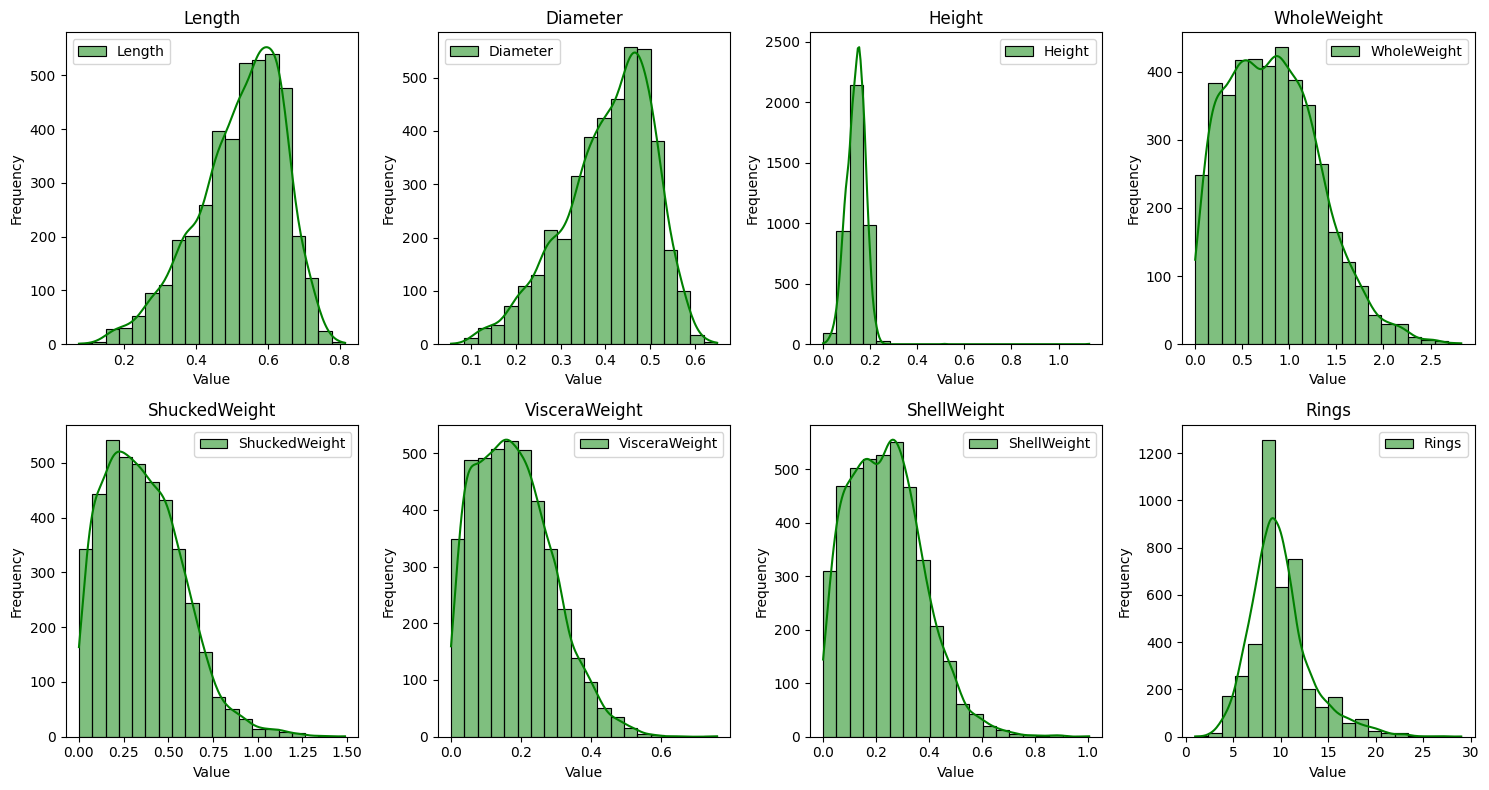

In [43]:

fig, axs = plt.subplots(2, 4, figsize=(15, 8))

# Loop through each continuous column and plot the histograms
for i, col in enumerate(numerical_var):
    # Determine the range of values to plot
    max_val = abalone_df[col].max()
    min_val = abalone_df[col].min()
    range_val = max_val - min_val
    
    # Determine the bin size and number of bins
    bin_size = range_val / 20
    num_bins = round(range_val / bin_size)
    
    # Calculate the subplot position
    row = i // 4
    col_pos = i % 4
    
    # Plot the histograms
    sns.histplot(
        abalone_df[col], 
        ax=axs[row][col_pos], 
        color='green', 
        kde=True, 
        bins=num_bins,
        label=col)
    
    axs[row][col_pos].set_title(col)
    axs[row][col_pos].set_xlabel('Value')
    axs[row][col_pos].set_ylabel('Frequency')
    axs[row][col_pos].legend()


plt.tight_layout()


fig = plt.gcf()
fig.savefig('/Users/elvaliu/Classes/python_project/780_assignment_shinny/790/distributions.png', dpi=300)
plt.show()

In [48]:
# random split the train/test dataset
X = abalone_df.drop('Rings', axis=1)
y = abalone_df['Rings']

# encoding the categorical variable 'Sex'
X = pd.get_dummies(X, columns=["Sex"], drop_first=False)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(3341, 10) (3341,)
(836, 10) (836,)


In [108]:
# Gradient Boosting
param_grid = {
    "n_estimators": [500, 1000, 2000],
    "learning_rate": [0.01, 0.1, 0.2],
    "max_depth": [3, 5, 7]
}

gbr = GradientBoostingRegressor(random_state=42)
# hyperparameters tuning with 5-fold cross validation
grid_search = GridSearchCV(
    estimator=gbr,
    param_grid=param_grid,
    scoring="neg_mean_squared_error",
    cv=5
)

grid_search.fit(X_train, y_train)

best_gbr = grid_search.best_estimator_

y_pred_gbr = best_gbr.predict(X_test)
mse_gbr = mean_squared_error(y_test, y_pred_gbr)

print("best hyperparameters:", grid_search.best_params_)
print("test mse:", mse_gbr)

best hyperparameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 1000}
test mse: 5.065440077499701


In [109]:
# Bagging
base_tree = DecisionTreeRegressor(random_state=42)
bg = BaggingRegressor(
    estimator=base_tree,
    random_state=42
)

param_grid_bg = {
    "n_estimators":[500, 1000, 2000],
    "estimator__max_depth": [3, 5, 7],
    "max_samples": [0.5, 1.0]
}

# hyperparameter tuning with 5-fold cross validation
grid_search_bg = GridSearchCV(
    estimator=bg,
    param_grid=param_grid_bg,
    scoring="neg_mean_squared_error",
    cv=5
)

grid_search_bg.fit(X_train, y_train)

best_bg = grid_search_bg.best_estimator_
y_pred_bg = best_bg.predict(X_test)

mse_bg = mean_squared_error(y_test, y_pred_bg)

print("best bagging hyperparameters:", grid_search_bg.best_params_)
print("test mse:", mse_bg)

best bagging hyperparameters: {'estimator__max_depth': 7, 'max_samples': 0.5, 'n_estimators': 1000}
test mse: 4.853862614614669


In [110]:
# Random Forests
rf = RandomForestRegressor(random_state=42)

param_grid_rf = {
    "n_estimators": [500, 1000, 2000],
    "max_depth": [3, 5, 7],
    "max_samples": [0.5, 1.0]
}

# hyperparameter tuning using 5-fold cross validation
grid_search_rf = GridSearchCV(
    estimator=rf,
    param_grid=param_grid_rf,
    scoring="neg_mean_squared_error",
    cv=5
)

grid_search_rf.fit(X_train,y_train)

best_rf = grid_search_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test)

mse_rf = mean_squared_error(y_test,y_pred_rf)

print("best random forest hyperparameters:", grid_search_rf.best_params_)
print("test mse:", round(mse_rf,2))

best random forest hyperparameters: {'max_depth': 7, 'max_samples': 0.5, 'n_estimators': 1000}
test mse: 4.85


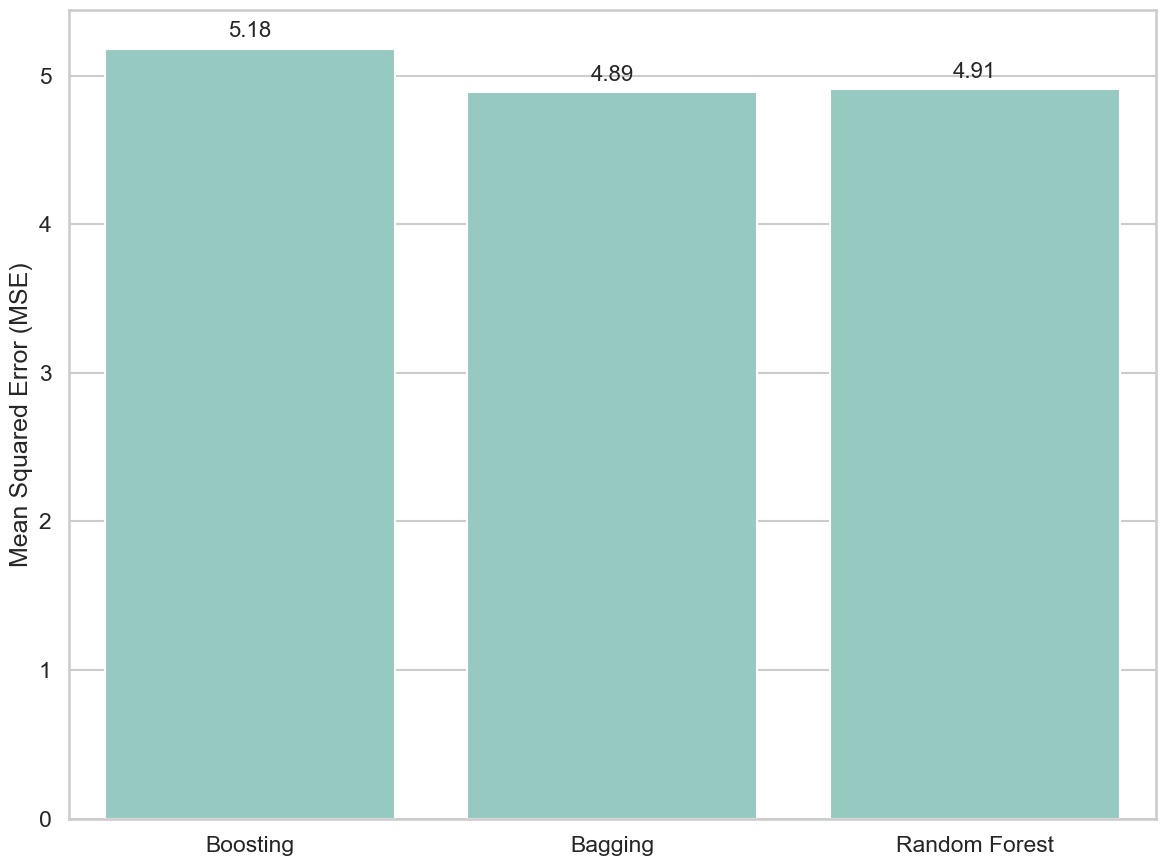

In [95]:
models = ['Boosting', 'Bagging', 'Random Forest']
mse_values = [mse_gbr,mse_bg, mse_rf]

sns.set_style("whitegrid")   
sns.set_palette("Set3")     

plt.figure(figsize=(12, 9))
ax = sns.barplot(x=models, y=mse_values)
for i, v in enumerate(mse_values):
    ax.text(i, v + 0.05,    
            f"{v:.2f}",    
            ha="center",    
            va="bottom",    
            fontsize=16)

#ax.set_xlabel("Model")
ax.set_ylabel("Mean Squared Error (MSE)")
#ax.set_title("Comparison of MSE Across Three Models")

plt.tight_layout()
plt.show()


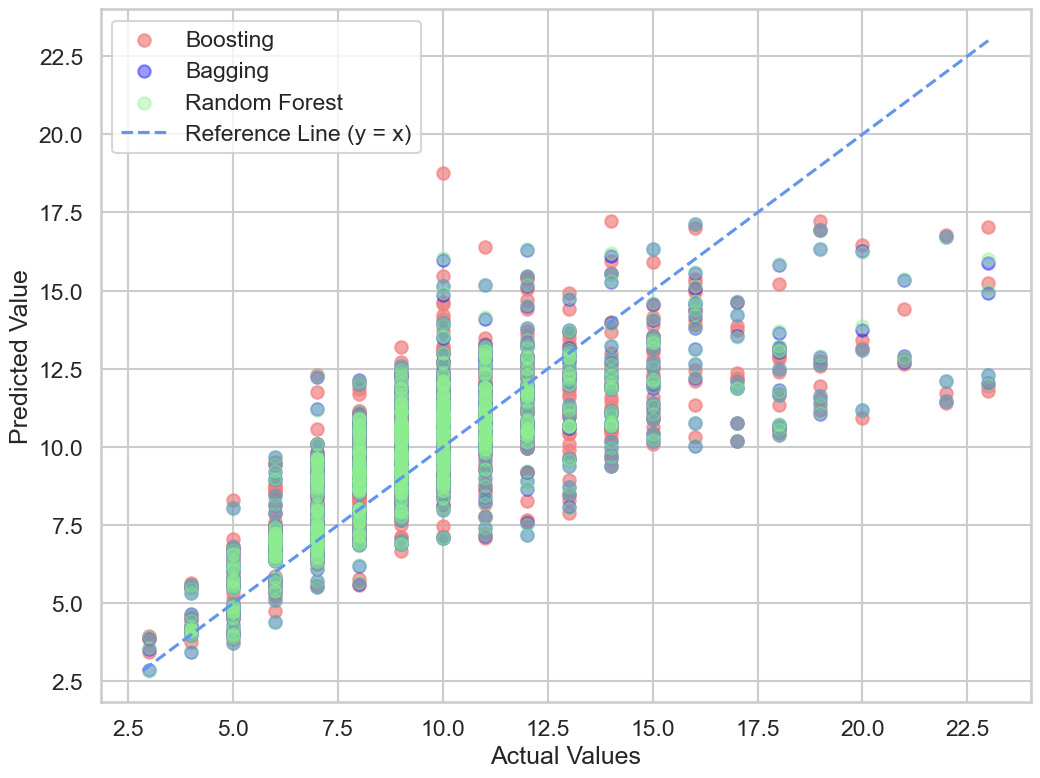

In [ ]:
plt.figure(figsize=(12, 9))
# Plot the results
plt.scatter(y_test, y_pred_gbr, label='Boosting', color='lightcoral', alpha=0.7)
plt.scatter(y_test, y_pred_bg, label='Bagging', color='blue', alpha=0.4)
plt.scatter(y_test, y_pred_rf, label='Random Forest', color='lightgreen', alpha=0.4)

min_val = min(y_test.min(), y_pred_gbr.min(), y_pred_bg.min(), y_pred_rf.min())
max_val = max(y_test.max(), y_pred_gbr.max(), y_pred_bg.max(), y_pred_rf.max())

plt.plot([min_val, max_val], [min_val, max_val], color='cornflowerblue', linestyle='--', label='Reference Line (y = x)')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Value")
plt.legend()
#plt.title("Model Comparison")
fig = plt.gcf()
fig.savefig('/Users/elvaliu/Classes/python_project/780_assignment_shinny/790/predict.png', dpi=300)

plt.show()

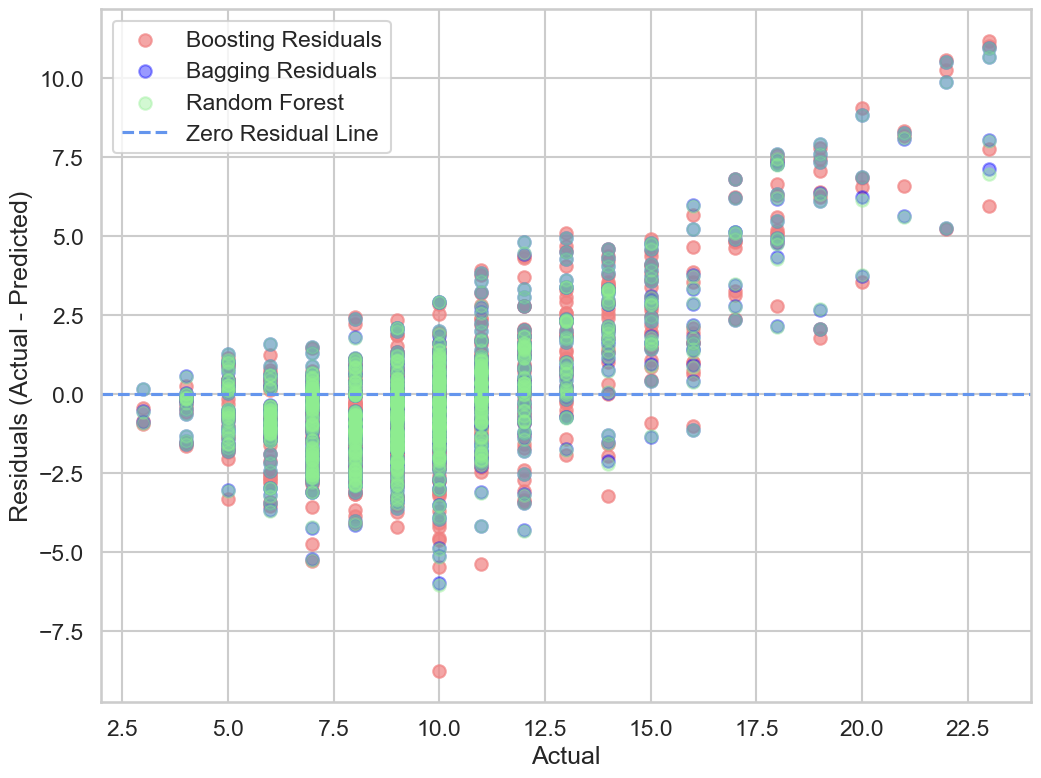

In [ ]:
plt.figure(figsize=(12, 9))
# Calculate residuals for both models
gbr_residuals = y_test - y_pred_gbr
rf_residuals = y_test - y_pred_rf
bg_residuals = y_test - y_pred_bg

# Plot residuals
plt.scatter(y_test, gbr_residuals, color='lightcoral', alpha=0.7, label='Boosting Residuals')
plt.scatter(y_test, bg_residuals, color='blue', alpha=0.4, label='Bagging Residuals')
plt.scatter(y_test, rf_residuals, color='lightgreen', alpha=0.4, label = 'Random Forest')

plt.axhline(y=0, color='cornflowerblue', linestyle='--', label='Zero Residual Line')

plt.xlabel("Actual")
plt.ylabel("Residuals (Actual - Predicted)")
#plt.title("Residuals Plot")
plt.legend()

fig = plt.gcf()
fig.savefig('/Users/elvaliu/Classes/python_project/780_assignment_shinny/790/residual.png', dpi=300)
plt.show()

plt.show()

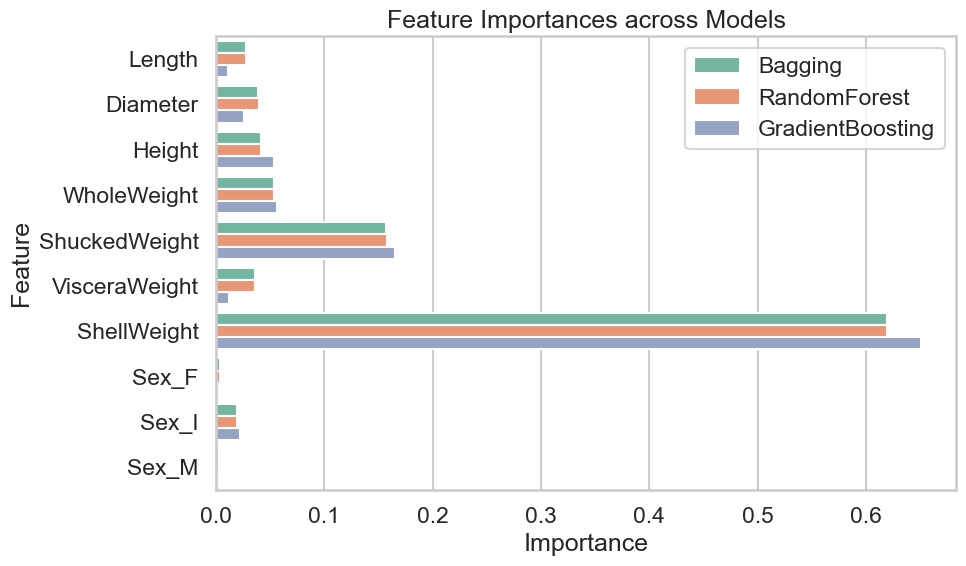

In [ ]:
# plot feature importance
features = X_train.columns

# extract feature importances from optimal bagging model
bag_feature_importances = np.mean(
    [tree.feature_importances_ for tree in best_bg.estimators_],
    axis=0
)

# extract feature importances from optimal bagging model for RandomForest and GradientBoosting
rf_feature_importances = best_rf.feature_importances_
gbr_feature_importances = best_gbr.feature_importances_

# create one DataFrame 
importances_df = pd.DataFrame({
    "Feature": features,
    "Bagging": bag_feature_importances,
    "RandomForest": rf_feature_importances,
    "GradientBoosting": gbr_feature_importances
})

importances_long = importances_df.melt(
    id_vars="Feature",
    var_name="Model",
    value_name="Importance"
)

plt.figure(figsize=(10, 6))
sns.barplot(
    data=importances_long,
    x="Importance",
    y="Feature",
    hue="Model",
    orient="h",
    palette="Set2"
)
plt.title("Feature Importances across Models")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.legend()
plt.tight_layout()
plt.show()
